<a href="https://colab.research.google.com/github/SYkkk55/Learn-Tensorflow-Keras-Note/blob/main/U8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN來了喔

## 多層感知器VS CVV卷積神經網路
## 最大的差異在 :
## **CNN增加了卷積層、池化層、來處理提取特徵**
---

## CNN介紹 ，可以分成兩部分:
## 1. 影像的特徵提取，透過卷積層、池化層 (擷取影像特徵很像是加入濾鏡的效果)
## 2. 完全連結神經網路，包含平坦層、隱藏層、輸出層 
----
## 卷積層的意義
## 將原本一個影像，經過卷積運算，產生多影像，像是照片卷積起來
## 卷積算不改變原影像大小，卷積的效果很類似濾鏡效果，可以提取不同特徵，EX:邊緣、線條、和角
---
## 使用Max-pool 做下採樣(downsampling)
## 有的好處是
## 1.減少需處理的資料點
## 2.讓影像位置差異變小
## 3.參數的數量和計算量下降=>控制overfitting

# 1.資料前處理
## 這裡和之前多層感知器(MLP)的資料型態不同
## 因為MLP 直接送進神經元處理 原本28*28的圖片把它壓扁成784
## 但CNN必須要通過卷積跟池化所以要維持影像的維度，也就是28*28*1


In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np 
np.random.seed(10)

In [ ]:
(x_Train,y_Train),(x_Test,y_Test)=mnist.load_data()

In [ ]:
print(x_Train.shape)

(60000, 28, 28)


In [ ]:
# 將feature 轉換成4維度 ，也就是6000*28*28*1
x_Train4D =x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D =x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

print(x_Train.shape)

# 數值標準化
x_Train4D_normalize=x_Train4D/255
x_Test4D_normalize=x_Test4D/255

# label 用one hot enconding 轉換
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=np_utils.to_categorical(y_Test)


(60000, 28, 28)


# 2.建立模型

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()

# 建立卷積層1=>28*28大小，但是產生16個影像
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

# 建立池化層1
# 執行第一次降採樣，原本的28*28變成14*14=>16個14*14
model.add(MaxPooling2D(pool_size=(2,2)))

# 建立卷積層2=>將原本的16個影像轉換成36，大小還是14*14
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))

# 建立池化層2=>原本36個14*14變成，36個7*7
model.add(MaxPooling2D(pool_size=(2,2)))

# 加入dropout 避免 overfitting，這裡的0.25，是在每一次捨棄25%的神經元
model.add(Dropout(0.25))

# --------------------------------
# 建立神經網路
# 建立平坦層=>把他們壓扁，所以是36個*14*14=1764對應1764個神經元
model.add(Flatten())

# 建立隱藏層
model.add(Dense(128,activation='relu'))

# 捨棄50%神經元
model.add(Dropout(0.5))

# 建立輸出層
model.add(Dense(10,activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

# 3.訓練模型

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)

Epoch 1/10
160/160 - 58s - loss: 0.4897 - accuracy: 0.8441 - val_loss: 0.1094 - val_accuracy: 0.9676
Epoch 2/10
160/160 - 53s - loss: 0.1460 - accuracy: 0.9559 - val_loss: 0.0733 - val_accuracy: 0.9771
Epoch 3/10
160/160 - 53s - loss: 0.1071 - accuracy: 0.9677 - val_loss: 0.0538 - val_accuracy: 0.9836
Epoch 4/10
160/160 - 53s - loss: 0.0852 - accuracy: 0.9743 - val_loss: 0.0489 - val_accuracy: 0.9848
Epoch 5/10
160/160 - 53s - loss: 0.0729 - accuracy: 0.9784 - val_loss: 0.0444 - val_accuracy: 0.9869
Epoch 6/10
160/160 - 53s - loss: 0.0633 - accuracy: 0.9812 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 7/10
160/160 - 53s - loss: 0.0597 - accuracy: 0.9817 - val_loss: 0.0396 - val_accuracy: 0.9881
Epoch 8/10
160/160 - 53s - loss: 0.0516 - accuracy: 0.9841 - val_loss: 0.0352 - val_accuracy: 0.9894
Epoch 9/10
160/160 - 53s - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0345 - val_accuracy: 0.9902
Epoch 10/10
160/160 - 53s - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0330 - val_accura

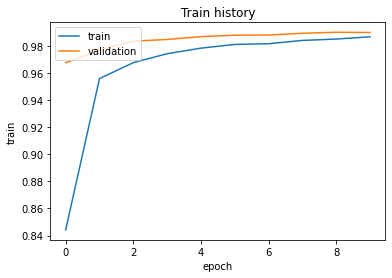

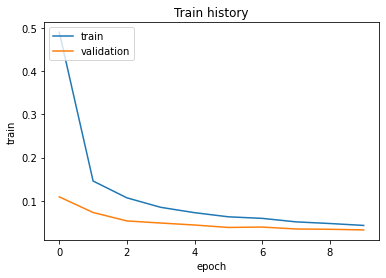

In [ ]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

# 4.評估模型準確率

In [ ]:
scores=model.evaluate(x_Test4D_normalize,y_TestOneHot)
print(scores[1])

313/313 [==============================] - 5s 14ms/step - loss: 0.0261 - accuracy: 0.9906
0.9905999898910522


# 5.執行預測

In [ ]:
prediction=model.predict_classes(x_Test4D_normalize)
prediction[:10]



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


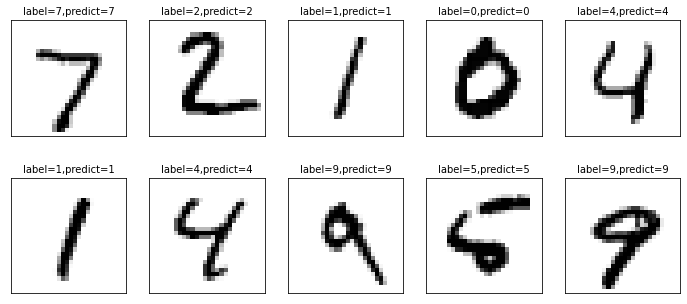

In [ ]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): 
  
  fig= plt.gcf()
  fig.set_size_inches(12,14)


  if num>25:num=25


  for i in range(0,num):

    ax=plt.subplot(5,5,i+1)
    ax.imshow(images[idx],cmap='binary')
    title="label=" +str(labels[idx])

    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])

    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])  
    idx+=1
  plt.show()  

plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)  

# 6.混淆矩陣

In [ ]:
import pandas as pd
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,1,0,1,1,0
1,0,1133,1,0,0,0,0,1,0,0
2,4,2,1020,0,1,0,0,5,0,0
3,0,0,0,997,0,7,0,1,2,3
4,0,0,0,0,975,0,0,0,0,7
5,2,0,0,3,0,885,2,0,0,0
6,4,2,0,1,2,3,945,0,1,0
7,0,4,2,0,0,0,0,1018,1,3
8,3,0,2,1,0,1,0,1,960,6
